In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# N=200

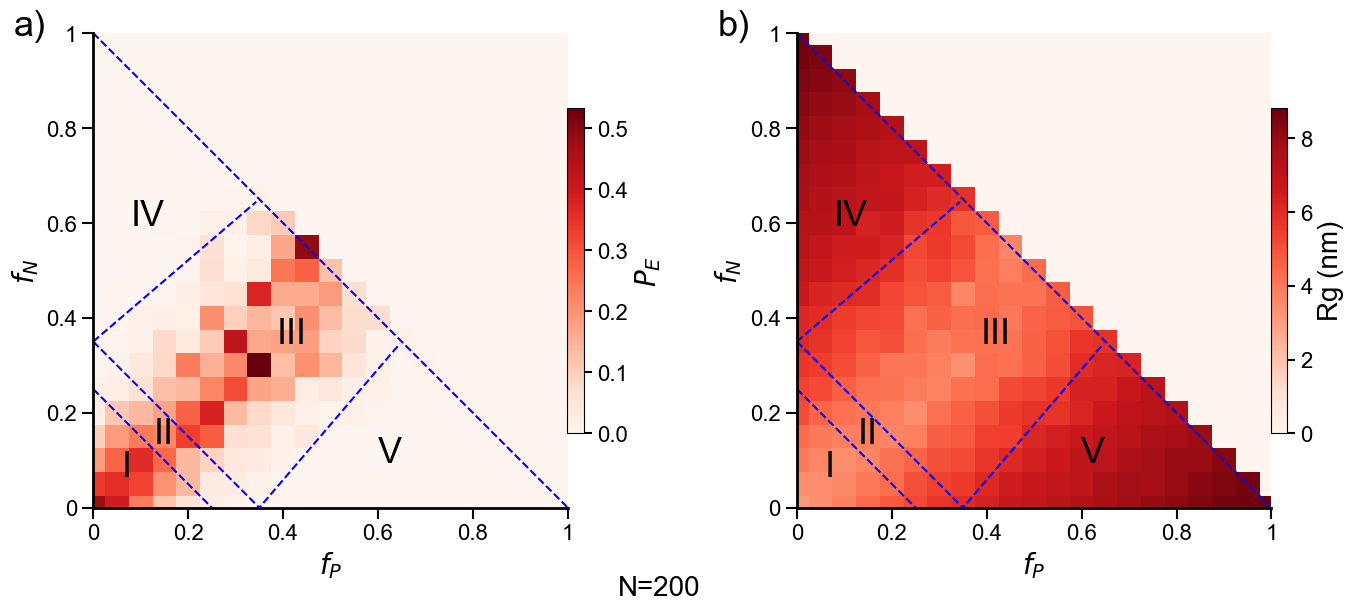

In [5]:
# Matplotlib settings for publication-quality plots
base_fontsize = 16
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
plt.rcParams['text.usetex'] = False  # Use Matplotlib's mathtext renderer

synthetic_length = 200
df = pd.read_pickle(f'N{synthetic_length}_results.pkl')
ent_mat = np.zeros((21, 21))
rg_mat = np.zeros((21, 21))
for fp, fn, ent_prob, rg in zip(df['f_positive'], df['f_negative'], df['entangled_probability'], df['Rg']):
    ent_mat[int(fn * 20), int(fp * 20)] = ent_prob #* 100  # scale to 100%
    rg_mat[int(fn * 20), int(fp * 20)] = rg

# Generate data for the plot (replace ent_mat and rg_mat with your actual data)
x = np.linspace(0, 1, 21)
y = np.linspace(0, 1, 21)
line_x = np.linspace(0, 1, 100)  # Line data
line_y_1 = 7/6 * line_x - 7/6*0.35
line_y_1_masked = np.where(7/6 * line_x - 7/6 * 0.35 < 0.35, 7/6 * line_x - 7/6 * 0.35, np.nan)
line_y_2 = 6/7*line_x + 0.35
line_y_2_masked = np.where(6/7 * line_x + 0.35 < 0.65, 6/7 * line_x + 0.35, np.nan)
line_y_3 = -line_x + 1
line_y_4 = -line_x + 0.35
line_y_5 = -line_x + 0.25
# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1 (Entangled probability)
cmap0 = ax[0].pcolormesh(x, y, ent_mat, cmap='Reds', shading='auto') #set min, max for colorscale: , vmin=0, vmax=100

ax[0].plot(line_x, line_y_1_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_2_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_3, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_4, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_5, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].set_xlabel(r'$f_{P}$', fontsize=base_fontsize+4)
ax[0].set_ylabel(r'$f_{N}$', fontsize=base_fontsize+4)

general_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Tick positions
general_ticklabels = ['0', '0.2', '0.4', '0.6', '0.8', '1']  # Only show labels for 0, 0.5, and 1
ax[0].set_yticks(general_ticks)
ax[0].set_yticklabels(general_ticklabels)
ax[0].set_xticks(general_ticks)
ax[0].set_xticklabels(general_ticklabels)

# ax[0].set_xticks(tick_values)
# ax[0].set_yticks(tick_values)
ax[0].tick_params(labelsize=base_fontsize, length=8, width=1.5)
# ax[0].set_title("Entangled Probability (%)", fontsize=14, weight='bold')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
# Set aspect ratio to be equal
ax[0].set_aspect('equal', adjustable='box')
ax[0].text(0.08, 0.12, 'I', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.17, 0.19, 'II', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.45, 0.4, 'III', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.15, 0.65, 'IV', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.65, 0.15, 'V', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')

colorbar0 = fig.colorbar(cmap0, ax=ax[0], fraction=0.03, pad= -0.001)
colorbar0.set_label(r"$P_{E}$", fontsize=base_fontsize+4)
colorbar0.ax.tick_params(labelsize=base_fontsize, length=6, width=1.5)  # Increase colorbar tick length and width

# Remove the top and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# Make remaining borders thicker
ax[0].spines['left'].set_linewidth(2)
ax[0].spines['bottom'].set_linewidth(2)

# Subplot 2 (Rg)
cmap1 = ax[1].pcolormesh(x, y, rg_mat, cmap='Reds', shading='auto')
ax[1].plot(line_x, line_y_1_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_2_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_3, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_4, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_5, color='blue', linestyle='--', linewidth=1.5, )  # Add the function

# add region label
ax[1].text(0.08, 0.12, 'I', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.17, 0.19, 'II', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.45, 0.4, 'III', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.15, 0.65, 'IV', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.65, 0.15, 'V', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')


ax[1].set_xlabel(r'$f_{P}$', fontsize= base_fontsize+4, weight='bold')
ax[1].set_ylabel(r'$f_{N}$', fontsize= base_fontsize+4, weight='bold')
# ax[1].set_xticks(tick_values)
# ax[1].set_yticks(tick_values)
general_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Tick positions
general_ticklabels = ['0', '0.2', '0.4', '0.6', '0.8', '1']  # Only show labels for 0, 0.5, and 1
ax[1].set_yticks(general_ticks)
ax[1].set_yticklabels(general_ticklabels)
ax[1].set_xticks(general_ticks)
ax[1].set_xticklabels(general_ticklabels)
ax[1].tick_params(labelsize=base_fontsize, length=8, width=1.5)
# ax[1].set_title("Rg (nm)", fontsize=14, weight='bold')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
# Set aspect ratio to be equal
ax[1].set_aspect('equal')

colorbar1 = fig.colorbar(cmap1, ax=ax[1], fraction=0.03, pad= -0.001)
colorbar1.set_label("Rg (nm)", fontsize=base_fontsize+4)
colorbar1.ax.tick_params(labelsize=base_fontsize, length=6, width=1.5)  # Increase colorbar tick length and width
colorbar1.set_ticks(np.arange(0,9,2))

# Remove the top and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# Make remaining borders thicker
ax[1].spines['left'].set_linewidth(2)
ax[1].spines['bottom'].set_linewidth(2)

# Add label for Panel (a), b
ax[0].text(-0.1, 1.05, 'a)', transform=ax[0].transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
ax[1].text(-0.1, 1.05, 'b)', transform=ax[1].transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
# Add N=200 at the bottom
fig.text(0.5, -0.0, f"N={synthetic_length}", fontsize=base_fontsize + 4, ha='center')

# Apply tight layout for spacing
plt.tight_layout()

plt.savefig(f'N{synthetic_length}_PE_Rg_v2.png', dpi=600, bbox_inches='tight')
plt.show()


# N = 100

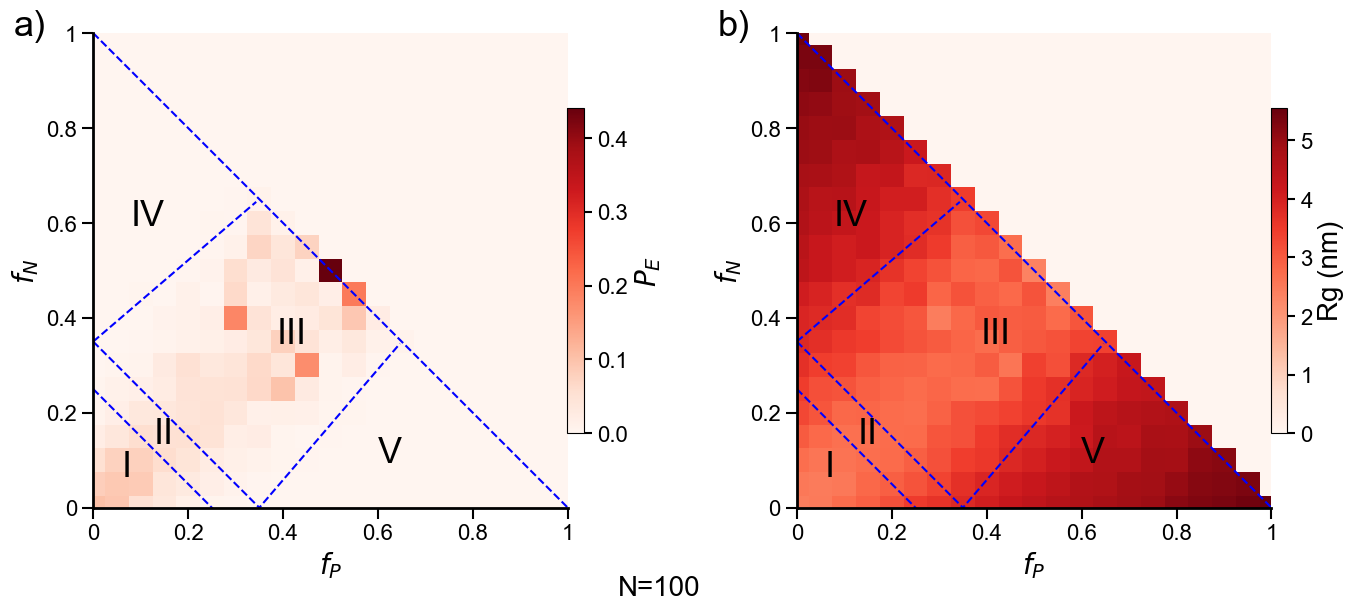

In [6]:
# Matplotlib settings for publication-quality plots
base_fontsize = 16
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
plt.rcParams['text.usetex'] = False  # Use Matplotlib's mathtext renderer

synthetic_length = 100
df = pd.read_pickle(f'N{synthetic_length}_results.pkl')
ent_mat = np.zeros((21, 21))
rg_mat = np.zeros((21, 21))
for fp, fn, ent_prob, rg in zip(df['f_positive'], df['f_negative'], df['entangled_probability'], df['Rg']):
    ent_mat[int(fn * 20), int(fp * 20)] = ent_prob #* 100  # scale to 100%
    rg_mat[int(fn * 20), int(fp * 20)] = rg

# Generate data for the plot (replace ent_mat and rg_mat with your actual data)
x = np.linspace(0, 1, 21)
y = np.linspace(0, 1, 21)
line_x = np.linspace(0, 1, 100)  # Line data
line_y_1 = 7/6 * line_x - 7/6*0.35
line_y_1_masked = np.where(7/6 * line_x - 7/6 * 0.35 < 0.35, 7/6 * line_x - 7/6 * 0.35, np.nan)
line_y_2 = 6/7*line_x + 0.35
line_y_2_masked = np.where(6/7 * line_x + 0.35 < 0.65, 6/7 * line_x + 0.35, np.nan)
line_y_3 = -line_x + 1
line_y_4 = -line_x + 0.35
line_y_5 = -line_x + 0.25
# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1 (Entangled probability)
cmap0 = ax[0].pcolormesh(x, y, ent_mat, cmap='Reds', shading='auto') #set min, max for colorscale: , vmin=0, vmax=100

ax[0].plot(line_x, line_y_1_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_2_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_3, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_4, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_5, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].set_xlabel(r'$f_{P}$', fontsize=base_fontsize+4)
ax[0].set_ylabel(r'$f_{N}$', fontsize=base_fontsize+4)

general_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Tick positions
general_ticklabels = ['0', '0.2', '0.4', '0.6', '0.8', '1']  # Only show labels for 0, 0.5, and 1
ax[0].set_yticks(general_ticks)
ax[0].set_yticklabels(general_ticklabels)
ax[0].set_xticks(general_ticks)
ax[0].set_xticklabels(general_ticklabels)

# ax[0].set_xticks(tick_values)
# ax[0].set_yticks(tick_values)
ax[0].tick_params(labelsize=base_fontsize, length=8, width=1.5)
# ax[0].set_title("Entangled Probability (%)", fontsize=14, weight='bold')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
# Set aspect ratio to be equal
ax[0].set_aspect('equal', adjustable='box')
ax[0].text(0.08, 0.12, 'I', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.17, 0.19, 'II', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.45, 0.4, 'III', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.15, 0.65, 'IV', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.65, 0.15, 'V', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')



colorbar0 = fig.colorbar(cmap0, ax=ax[0], fraction=0.03, pad= -0.001)
colorbar0.set_label(r"$P_{E}$", fontsize=base_fontsize+4)
colorbar0.ax.tick_params(labelsize=base_fontsize, length=6, width=1.5)  # Increase colorbar tick length and width

# Remove the top and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# Make remaining borders thicker
ax[0].spines['left'].set_linewidth(2)
ax[0].spines['bottom'].set_linewidth(2)

# Subplot 2 (Rg)
cmap1 = ax[1].pcolormesh(x, y, rg_mat, cmap='Reds', shading='auto')
ax[1].plot(line_x, line_y_1_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_2_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_3, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_4, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_5, color='blue', linestyle='--', linewidth=1.5, )  # Add the function

# add region label
ax[1].text(0.08, 0.12, 'I', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.17, 0.19, 'II', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.45, 0.4, 'III', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.15, 0.65, 'IV', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.65, 0.15, 'V', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')


ax[1].set_xlabel(r'$f_{P}$', fontsize= base_fontsize+4, weight='bold')
ax[1].set_ylabel(r'$f_{N}$', fontsize= base_fontsize+4, weight='bold')
# ax[1].set_xticks(tick_values)
# ax[1].set_yticks(tick_values)
general_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Tick positions
general_ticklabels = ['0', '0.2', '0.4', '0.6', '0.8', '1']  # Only show labels for 0, 0.5, and 1
ax[1].set_yticks(general_ticks)
ax[1].set_yticklabels(general_ticklabels)
ax[1].set_xticks(general_ticks)
ax[1].set_xticklabels(general_ticklabels)
ax[1].tick_params(labelsize=base_fontsize, length=8, width=1.5)
# ax[1].set_title("Rg (nm)", fontsize=14, weight='bold')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
# Set aspect ratio to be equal
ax[1].set_aspect('equal')



colorbar1 = fig.colorbar(cmap1, ax=ax[1], fraction=0.03, pad= -0.001)
colorbar1.set_label("Rg (nm)", fontsize=base_fontsize+4)
colorbar1.ax.tick_params(labelsize=base_fontsize, length=6, width=1.5)  # Increase colorbar tick length and width
colorbar1.set_ticks(np.arange(0,6,1))

# Remove the top and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# Make remaining borders thicker
ax[1].spines['left'].set_linewidth(2)
ax[1].spines['bottom'].set_linewidth(2)

# Add a title for the figure
# fig.suptitle(f"N={synthetic_length}", fontsize=base_fontsize+4, )


# Add label for Panel (a), b
ax[0].text(-0.1, 1.05, 'a)', transform=ax[0].transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
ax[1].text(-0.1, 1.05, 'b)', transform=ax[1].transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
# Add N=200 at the bottom
fig.text(0.5, -0.0, f"N={synthetic_length}", fontsize=base_fontsize + 4, ha='center')

# Apply tight layout for spacing
plt.tight_layout()

plt.savefig(f'N{synthetic_length}_PE_Rg_v2.png', dpi=600, bbox_inches='tight')
plt.show()


# N=300

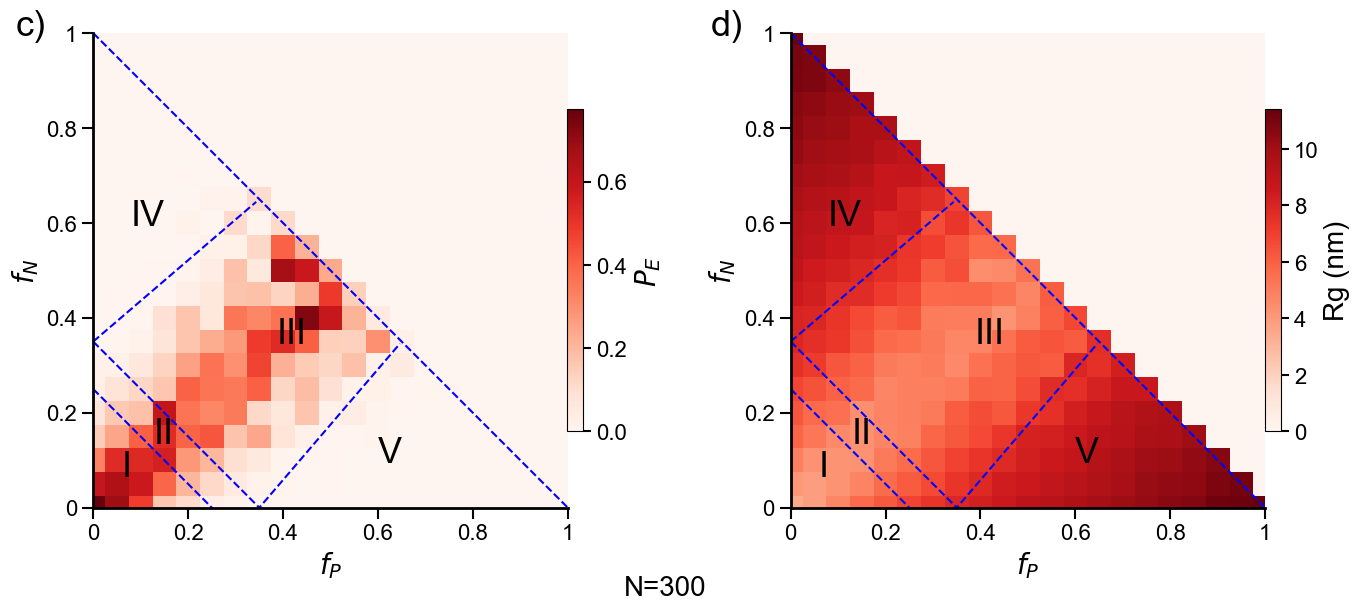

In [7]:
# Matplotlib settings for publication-quality plots
base_fontsize = 16
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
plt.rcParams['text.usetex'] = False  # Use Matplotlib's mathtext renderer

synthetic_length = 300
df = pd.read_pickle(f'N{synthetic_length}_results.pkl')
ent_mat = np.zeros((21, 21))
rg_mat = np.zeros((21, 21))
for fp, fn, ent_prob, rg in zip(df['f_positive'], df['f_negative'], df['entangled_probability'], df['Rg']):
    ent_mat[int(fn * 20), int(fp * 20)] = ent_prob #* 100  # scale to 100%
    rg_mat[int(fn * 20), int(fp * 20)] = rg

# Generate data for the plot (replace ent_mat and rg_mat with your actual data)
x = np.linspace(0, 1, 21)
y = np.linspace(0, 1, 21)
line_x = np.linspace(0, 1, 100)  # Line data
line_y_1 = 7/6 * line_x - 7/6*0.35
line_y_1_masked = np.where(7/6 * line_x - 7/6 * 0.35 < 0.35, 7/6 * line_x - 7/6 * 0.35, np.nan)
line_y_2 = 6/7*line_x + 0.35
line_y_2_masked = np.where(6/7 * line_x + 0.35 < 0.65, 6/7 * line_x + 0.35, np.nan)
line_y_3 = -line_x + 1
line_y_4 = -line_x + 0.35
line_y_5 = -line_x + 0.25
# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1 (Entangled probability)
cmap0 = ax[0].pcolormesh(x, y, ent_mat, cmap='Reds', shading='auto') #set min, max for colorscale: , vmin=0, vmax=100

ax[0].plot(line_x, line_y_1_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_2_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_3, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_4, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].plot(line_x, line_y_5, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[0].set_xlabel(r'$f_{P}$', fontsize=base_fontsize+4)
ax[0].set_ylabel(r'$f_{N}$', fontsize=base_fontsize+4)

general_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Tick positions
general_ticklabels = ['0', '0.2', '0.4', '0.6', '0.8', '1']  # Only show labels for 0, 0.5, and 1
ax[0].set_yticks(general_ticks)
ax[0].set_yticklabels(general_ticklabels)
ax[0].set_xticks(general_ticks)
ax[0].set_xticklabels(general_ticklabels)

# ax[0].set_xticks(tick_values)
# ax[0].set_yticks(tick_values)
ax[0].tick_params(labelsize=base_fontsize, length=8, width=1.5)
# ax[0].set_title("Entangled Probability (%)", fontsize=14, weight='bold')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
# Set aspect ratio to be equal
ax[0].set_aspect('equal', adjustable='box')

ax[0].text(0.08, 0.12, 'I', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.17, 0.19, 'II', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.45, 0.4, 'III', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.15, 0.65, 'IV', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[0].text(0.65, 0.15, 'V', transform=ax[0].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')


colorbar0 = fig.colorbar(cmap0, ax=ax[0], fraction=0.03, pad= -0.001)
colorbar0.set_label(r"$P_{E}$", fontsize=base_fontsize+4)
colorbar0.ax.tick_params(labelsize=base_fontsize, length=6, width=1.5)  # Increase colorbar tick length and width

# Remove the top and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# Make remaining borders thicker
ax[0].spines['left'].set_linewidth(2)
ax[0].spines['bottom'].set_linewidth(2)

# Subplot 2 (Rg)
cmap1 = ax[1].pcolormesh(x, y, rg_mat, cmap='Reds', shading='auto')
ax[1].plot(line_x, line_y_1_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_2_masked, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_3, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_4, color='blue', linestyle='--', linewidth=1.5, )  # Add the function
ax[1].plot(line_x, line_y_5, color='blue', linestyle='--', linewidth=1.5, )  # Add the function

# add region label
ax[1].text(0.08, 0.12, 'I', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.17, 0.19, 'II', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.45, 0.4, 'III', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.15, 0.65, 'IV', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')
ax[1].text(0.65, 0.15, 'V', transform=ax[1].transAxes, fontsize=base_fontsize+10, c='black', fontweight='regular', va='top', ha='right')


ax[1].set_xlabel(r'$f_{P}$', fontsize= base_fontsize+4, weight='bold')
ax[1].set_ylabel(r'$f_{N}$', fontsize= base_fontsize+4, weight='bold')
# ax[1].set_xticks(tick_values)
# ax[1].set_yticks(tick_values)
general_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Tick positions
general_ticklabels = ['0', '0.2', '0.4', '0.6', '0.8', '1']  # Only show labels for 0, 0.5, and 1
ax[1].set_yticks(general_ticks)
ax[1].set_yticklabels(general_ticklabels)
ax[1].set_xticks(general_ticks)
ax[1].set_xticklabels(general_ticklabels)
ax[1].tick_params(labelsize=base_fontsize, length=8, width=1.5)
# ax[1].set_title("Rg (nm)", fontsize=14, weight='bold')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
# Set aspect ratio to be equal
ax[1].set_aspect('equal')

colorbar1 = fig.colorbar(cmap1, ax=ax[1], fraction=0.03, pad= -0.001)
colorbar1.set_label("Rg (nm)", fontsize=base_fontsize+4)
colorbar1.ax.tick_params(labelsize=base_fontsize, length=6, width=1.5)  # Increase colorbar tick length and width
colorbar1.set_ticks(np.arange(0,12,2))

# Remove the top and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# Make remaining borders thicker
ax[1].spines['left'].set_linewidth(2)
ax[1].spines['bottom'].set_linewidth(2)

# Add label for Panel (a), b
ax[0].text(-0.1, 1.05, 'c)', transform=ax[0].transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
ax[1].text(-0.1, 1.05, 'd)', transform=ax[1].transAxes, fontsize=base_fontsize+10, fontweight='regular', va='top', ha='right')
# Add N=200 at the bottom
fig.text(0.5, -0.0, f"N={synthetic_length}", fontsize=base_fontsize + 4, ha='center')

# Apply tight layout for spacing
plt.tight_layout()

plt.savefig(f'N{synthetic_length}_PE_Rg_v2.png', dpi=600, bbox_inches='tight')
plt.show()
